In [2]:
import pandas as pd
import ast


In [3]:
df=pd.read_csv("ner.csv")

In [4]:
df

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe..."
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47959 non-null  object
 1   Sentence    47959 non-null  object
 2   POS         47959 non-null  object
 3   Tag         47959 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [6]:
df.describe()

,Sentence #,Sentence,POS,Tag
count,47959,47959,47959,47959
unique,47959,47575,47214,33318
top,Sentence: 47959,VOA 's Mil Arcega reports .,"['NNP', 'POS', 'NNP', 'NNP', 'VBZ', '.']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
freq,1,17,39,450


In [7]:
df.isnull().sum()

Sentence #    0
Sentence      0
POS           0
Tag           0
dtype: int64

In [8]:
df.dtypes

Sentence #    object
Sentence      object
POS           object
Tag           object
dtype: object

In [9]:
df.isnull().sum()

Sentence #    0
Sentence      0
POS           0
Tag           0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
df["Sentence #"]=le.fit_transform(df["Sentence #"])
df["Sentence"]=le.fit_transform(df["Sentence"])
df["POS"]=le.fit_transform(df["POS"])
df["Tag"]=le.fit_transform(df["Tag"])


In [13]:
df

,Sentence #,Sentence,POS,Tag
0,0,44256,38630,25890
1,11111,10252,38590,32686
2,22222,43624,42509,30553
3,33333,27020,39052,33303
4,42404,41180,10100,30596
...,...,...,...,...
47954,42173,16326,20883,4147
47955,42174,16337,22793,4312
47956,42175,45083,1203,33307
47957,42176,43758,43784,33307


In [14]:
df.dtypes

Sentence #    int64
Sentence      int64
POS           int64
Tag           int64
dtype: object

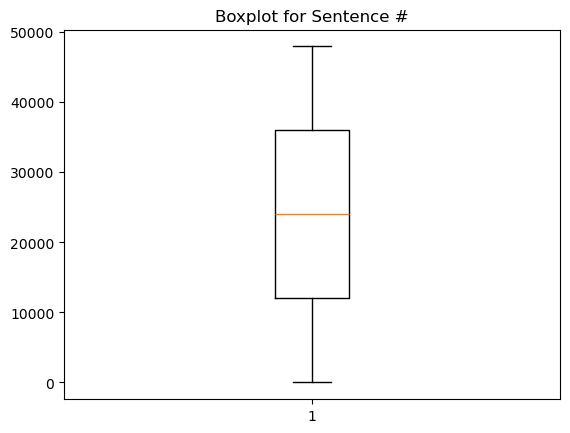

In [15]:
import matplotlib.pyplot as plt

plt.boxplot(df['Sentence #'])
plt.title('Boxplot for Sentence #')
plt.show()

In [16]:
Q1 = df['Sentence #'].quantile(0.25)
Q3 = df['Sentence #'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Sentence #'] < Q1 - 1.5 * IQR) | (df['Sentence #'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [Sentence #, Sentence, POS, Tag]
Index: []


In [17]:
Q1 = df['Sentence'].quantile(0.25)
Q3 = df['Sentence'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Sentence'] < Q1 - 1.5 * IQR) | (df['Sentence'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [Sentence #, Sentence, POS, Tag]
Index: []


In [18]:
Q1 = df['POS'].quantile(0.25)
Q3 = df['POS'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['POS'] < Q1 - 1.5 * IQR) | (df['POS'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [Sentence #, Sentence, POS, Tag]
Index: []


In [19]:
Q1 = df['Tag'].quantile(0.25)
Q3 = df['Tag'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Tag'] < Q1 - 1.5 * IQR) | (df['Tag'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [Sentence #, Sentence, POS, Tag]
Index: []


In [20]:
import spacy


In [25]:
from spacy.tokens import DocBin

In [26]:
df = pd.read_csv("ner.csv")


In [28]:
sentences = []
for sent_id, group in df.groupby("Sentence #"):
    tokens = list(group["POS"])
    labels = list(group["Tag"])
    sentences.append((tokens, labels))


In [29]:
nlp = spacy.blank("en")  # Blank English model


In [30]:
ner = nlp.add_pipe("ner")  # Add NER pipeline


In [31]:
unique_labels = set(df["Tag"].unique()) - {"O"}  # Remove 'O' (outside any entity)
for label in unique_labels:
    ner.add_label(label)

In [32]:
doc_bin = DocBin()


In [33]:
for tokens, labels in sentences:
    doc = nlp.make_doc(" ".join(tokens))
    ents = []
    start = 0
    for token, label in zip(tokens, labels):
        end = start + len(token)
        if label != "O":
            span = doc.char_span(start, end, label=label)
            if span:
                ents.append(span)
        start = end + 1
    doc.ents = ents
    doc_bin.add(doc)

In [34]:
doc_bin.to_disk("train.spacy")


In [35]:
nlp = spacy.load("en_core_web_sm")  # OR nlp = spacy.load("./model/model-best")


In [36]:
new_text = "Elon Musk founded SpaceX in 2002 in California."


In [37]:
doc = nlp(new_text)


In [38]:
print("Entities found:")


Entities found:


In [39]:
for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}")


Elon Musk -> PERSON
2002 -> DATE
California -> GPE


In [42]:
nlp = spacy.load("en_core_web_sm")  # or "./model/model-best"


In [43]:
text = "Elon Musk founded SpaceX in 2002 and Apple is looking to buy a startup in London."


In [44]:
doc = nlp(text)


In [45]:
print("Extracted Entities with Labels:")


Extracted Entities with Labels:


In [46]:
for ent in doc.ents:
    print(f"{ent.text:<20}  -->  {ent.label_}")


Elon Musk             -->  PERSON
2002                  -->  DATE
Apple                 -->  ORG
London                -->  GPE


In [47]:
from collections import Counter


In [48]:
entity_labels = [ent.label_ for ent in doc.ents]
entity_counts = Counter(entity_labels)

In [49]:
print("Entity Frequency:", entity_counts)


Entity Frequency: Counter({'PERSON': 1, 'DATE': 1, 'ORG': 1, 'GPE': 1})


In [50]:
import matplotlib.pyplot as plt


In [51]:
labels = list(entity_counts.keys())
values = list(entity_counts.values())


<BarContainer object of 4 artists>

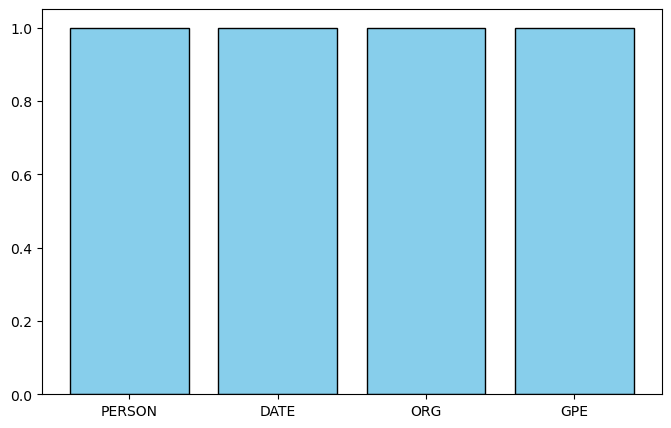

In [52]:
plt.figure(figsize=(8,5))
plt.bar(labels, values, color='skyblue', edgecolor='black')

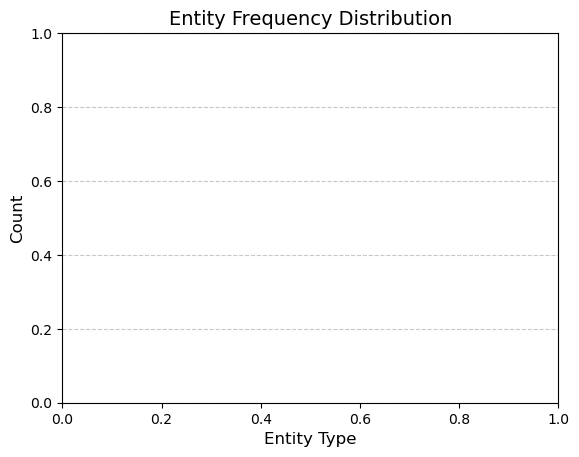

In [53]:
plt.title("Entity Frequency Distribution", fontsize=14)
plt.xlabel("Entity Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
from spacy import displacy